#### REGNO: 19MID0023  NAME : Saksham Verma
### Question:
Implement Multilayer perceptron and analyse the classification result for lower back pain symptoms using Dataset_spine dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

### Importing data

In [2]:
dataset_spine = pd.read_csv('Dataset_spine.csv')

### Evaluating dataset

In [3]:
dataset_spine.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [4]:
dataset_spine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


### Finding unique values and there respective counts

In [5]:
dataset_spine.Class_att.unique()

array(['Abnormal', 'Normal'], dtype=object)

### Preprocessing the datasets

In [6]:
# check for null values
dataset_spine.isnull().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

In [30]:
dataset_spine.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


### Preparing data for train-test

In [7]:
y = dataset_spine['Class_att']
x =dataset_spine.drop(['Class_att'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

### Preparing MODEL

In [8]:
MultiLayerPer_classifier = MLPClassifier(random_state = 13, verbose = False)
MultiLayerPer_classifier.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 13,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### FITTING TRAINING DATA

In [9]:
MultiLayerPer_classifier.fit(x_train, y_train)

MLPClassifier(random_state=13)

### Getting accuracy score

In [10]:
y_pred =MultiLayerPer_classifier.predict(x_test)
MultiLayerPer_classifier.score(x_test, y_test)

0.8387096774193549

###  precision ,recall, f1-score and  support

In [11]:
MAT = classification_report(y_test, y_pred)
print(MAT)

              precision    recall  f1-score   support

    Abnormal       0.92      0.83      0.88        42
      Normal       0.71      0.85      0.77        20

    accuracy                           0.84        62
   macro avg       0.81      0.84      0.82        62
weighted avg       0.85      0.84      0.84        62



### Chosing Identity,logistic,tanh as ACTIVATION FUNCTION and generating models

In [12]:
MultiLayerPer_classifier_ID = MLPClassifier(activation = 'identity', max_iter = 500,random_state = 13, verbose = False)

In [13]:
MultiLayerPer_classifier_LG = MLPClassifier(activation = 'logistic', max_iter = 500,random_state = 13, verbose = False)

In [14]:
MultiLayerPer_classifier_TH = MLPClassifier(activation = 'tanh', max_iter = 500,random_state = 13, verbose = False)

In [15]:
MultiLayerPer_classifier_ID.fit(x_train, y_train)

MLPClassifier(activation='identity', max_iter=500, random_state=13)

In [16]:
MultiLayerPer_classifier_LG.fit(x_train, y_train)

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', max_iter=500, random_state=13)

In [17]:
MultiLayerPer_classifier_TH.fit(x_train, y_train)

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', max_iter=500, random_state=13)

###  precision ,recall, f1-score and  support for Identity ACTIVATION

In [18]:
y_pred =MultiLayerPer_classifier_ID.predict(x_test)
print(MultiLayerPer_classifier_ID.score(x_test, y_test))
MAT_ID = classification_report(y_test, y_pred)
print(MultiLayerPer_classifier_ID)

0.8548387096774194
MLPClassifier(activation='identity', max_iter=500, random_state=13)


###  precision ,recall, f1-score and  support for logistic ACTIVATION

In [19]:
y_pred = MultiLayerPer_classifier_LG.predict(x_test)
print(MultiLayerPer_classifier_LG.score(x_test, y_test))
MAT_LG = classification_report(y_test, y_pred)
print(MAT_LG)

0.8387096774193549
              precision    recall  f1-score   support

    Abnormal       0.90      0.86      0.88        42
      Normal       0.73      0.80      0.76        20

    accuracy                           0.84        62
   macro avg       0.81      0.83      0.82        62
weighted avg       0.84      0.84      0.84        62



###  precision ,recall, f1-score and  support fortanh  ACTIVATION

In [20]:
y_pred = MultiLayerPer_classifier_TH.predict(x_test)
print(MultiLayerPer_classifier_TH.score(x_test, y_test))
MAT_TH = classification_report(y_test, y_pred)
print(MAT_TH)

0.8225806451612904
              precision    recall  f1-score   support

    Abnormal       0.90      0.83      0.86        42
      Normal       0.70      0.80      0.74        20

    accuracy                           0.82        62
   macro avg       0.80      0.82      0.80        62
weighted avg       0.83      0.82      0.83        62



In [21]:
MultiLayerPer_classifier_LG = MLPClassifier(hidden_layer_sizes = (100, 100, 100,),activation = 'logistic', max_iter = 1000,random_state = 13, verbose = False)
MultiLayerPer_classifier_LG.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100),
              max_iter=1000, random_state=13)

In [22]:
y_pred = MultiLayerPer_classifier_LG.predict(x_test)
print(MultiLayerPer_classifier_LG.score(x_test, y_test))
MAT = classification_report(y_test, y_pred)
print(MAT)

0.7741935483870968
              precision    recall  f1-score   support

    Abnormal       0.83      0.83      0.83        42
      Normal       0.65      0.65      0.65        20

    accuracy                           0.77        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.77      0.77      0.77        62



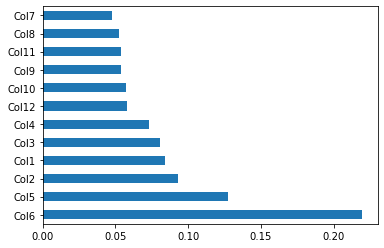

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
modelExtraTreesClassifier = ExtraTreesClassifier()
modelExtraTreesClassifier.fit(x,y)
feat_importances = pd.Series(modelExtraTreesClassifier.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [24]:
data_Frame = pd.read_csv('Dataset_spine.csv')
data_Frame = data_Frame.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)
data_Frame.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [25]:
y = data_Frame['Class_att']
x = data_Frame.drop(['Class_att'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 13)

In [26]:
MLPClassifierclf = MLPClassifier(hidden_layer_sizes = (100,100,100), random_state = 13, activation = 'logistic', verbose = False, validation_fraction = 0.2)                    
MLPClassifierclf.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 100),
              random_state=13, validation_fraction=0.2)

In [27]:
y_pred = MLPClassifierclf.predict(x_test)
MLPClassifierclf.score(x_test, y_test)

0.8064516129032258

In [28]:
MAT = classification_report(y_test, y_pred)
print(MAT)

              precision    recall  f1-score   support

    Abnormal       0.88      0.83      0.85        42
      Normal       0.68      0.75      0.71        20

    accuracy                           0.81        62
   macro avg       0.78      0.79      0.78        62
weighted avg       0.81      0.81      0.81        62

